### 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import datetime

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
import sklearn
from sklearn.metrics import mean_squared_error

### 2. Read and Cleanup Data

In [4]:
data = pd.read_csv('cpiai.csv')
data.head()

,Date,Index,Inflation
0,1913-01-01,9.8,0.00
1,1913-02-01,9.8,0.00
2,1913-03-01,9.8,0.00
3,1913-04-01,9.8,0.00
4,1913-05-01,9.7,-1.02


In [5]:
data.tail()

,Date,Index,Inflation
1208,2013-09-01,234.149,0.12
1209,2013-10-01,233.546,-0.26
1210,2013-11-01,233.069,-0.20
1211,2013-12-01,233.049,-0.01
1212,2014-01-01,233.916,0.37


In [6]:
data.tail()

,Date,Index,Inflation
1208,2013-09-01,234.149,0.12
1209,2013-10-01,233.546,-0.26
1210,2013-11-01,233.069,-0.20
1211,2013-12-01,233.049,-0.01
1212,2014-01-01,233.916,0.37


In [7]:
data.shape

(1213, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1213 non-null   object 
 1   Index      1213 non-null   float64
 2   Inflation  1213 non-null   float64
dtypes: float64(2), object(1)
memory usage: 28.6+ KB


In [9]:
data.describe()

,Index,Inflation
count,1213.00000,1213.000000
mean,70.36088,0.264106
std,68.90227,0.661618
min,9.70000,-3.160000
25%,17.30000,0.000000
50%,30.70000,0.240000
75%,120.20000,0.560000
max,234.14900,5.880000


In [10]:
data.isnull().sum()

Date         0
Index        0
Inflation    0
dtype: int64

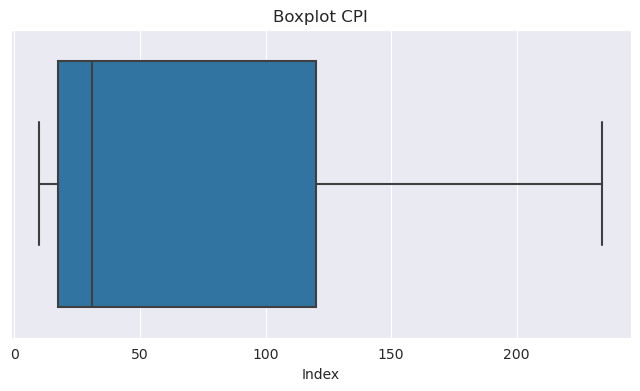

In [11]:
plt.figure(figsize=(8,4))
plt.title('Boxplot CPI')
sns.boxplot(data['Index'])
plt.savefig('Boxplot.jpg')
plt.show()


In [12]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.head()

,Date,Index,Inflation,Year
0,1913-01-01,9.8,0.00,1913
1,1913-02-01,9.8,0.00,1913
2,1913-03-01,9.8,0.00,1913
3,1913-04-01,9.8,0.00,1913
4,1913-05-01,9.7,-1.02,1913


In [13]:
data['Month'] = pd.DatetimeIndex(data['Date']).month
data.head()

,Date,Index,Inflation,Year,Month
0,1913-01-01,9.8,0.00,1913,1
1,1913-02-01,9.8,0.00,1913,2
2,1913-03-01,9.8,0.00,1913,3
3,1913-04-01,9.8,0.00,1913,4
4,1913-05-01,9.7,-1.02,1913,5


In [14]:
ndata = data.groupby(['Date'])['Index','Inflation'].median().reset_index()
ndata.head()

,Date,Index,Inflation
0,1913-01-01,9.8,0.00
1,1913-02-01,9.8,0.00
2,1913-03-01,9.8,0.00
3,1913-04-01,9.8,0.00
4,1913-05-01,9.7,-1.02


In [15]:
ndata = pd.DataFrame(ndata)
ndata = ndata.set_index(['Date'])

In [16]:
ndata.head()

,Index,Inflation
Date,,
1913-01-01,9.8,0.00
1913-02-01,9.8,0.00
1913-03-01,9.8,0.00
1913-04-01,9.8,0.00
1913-05-01,9.7,-1.02


In [17]:
ndata.index.dtype

dtype('O')

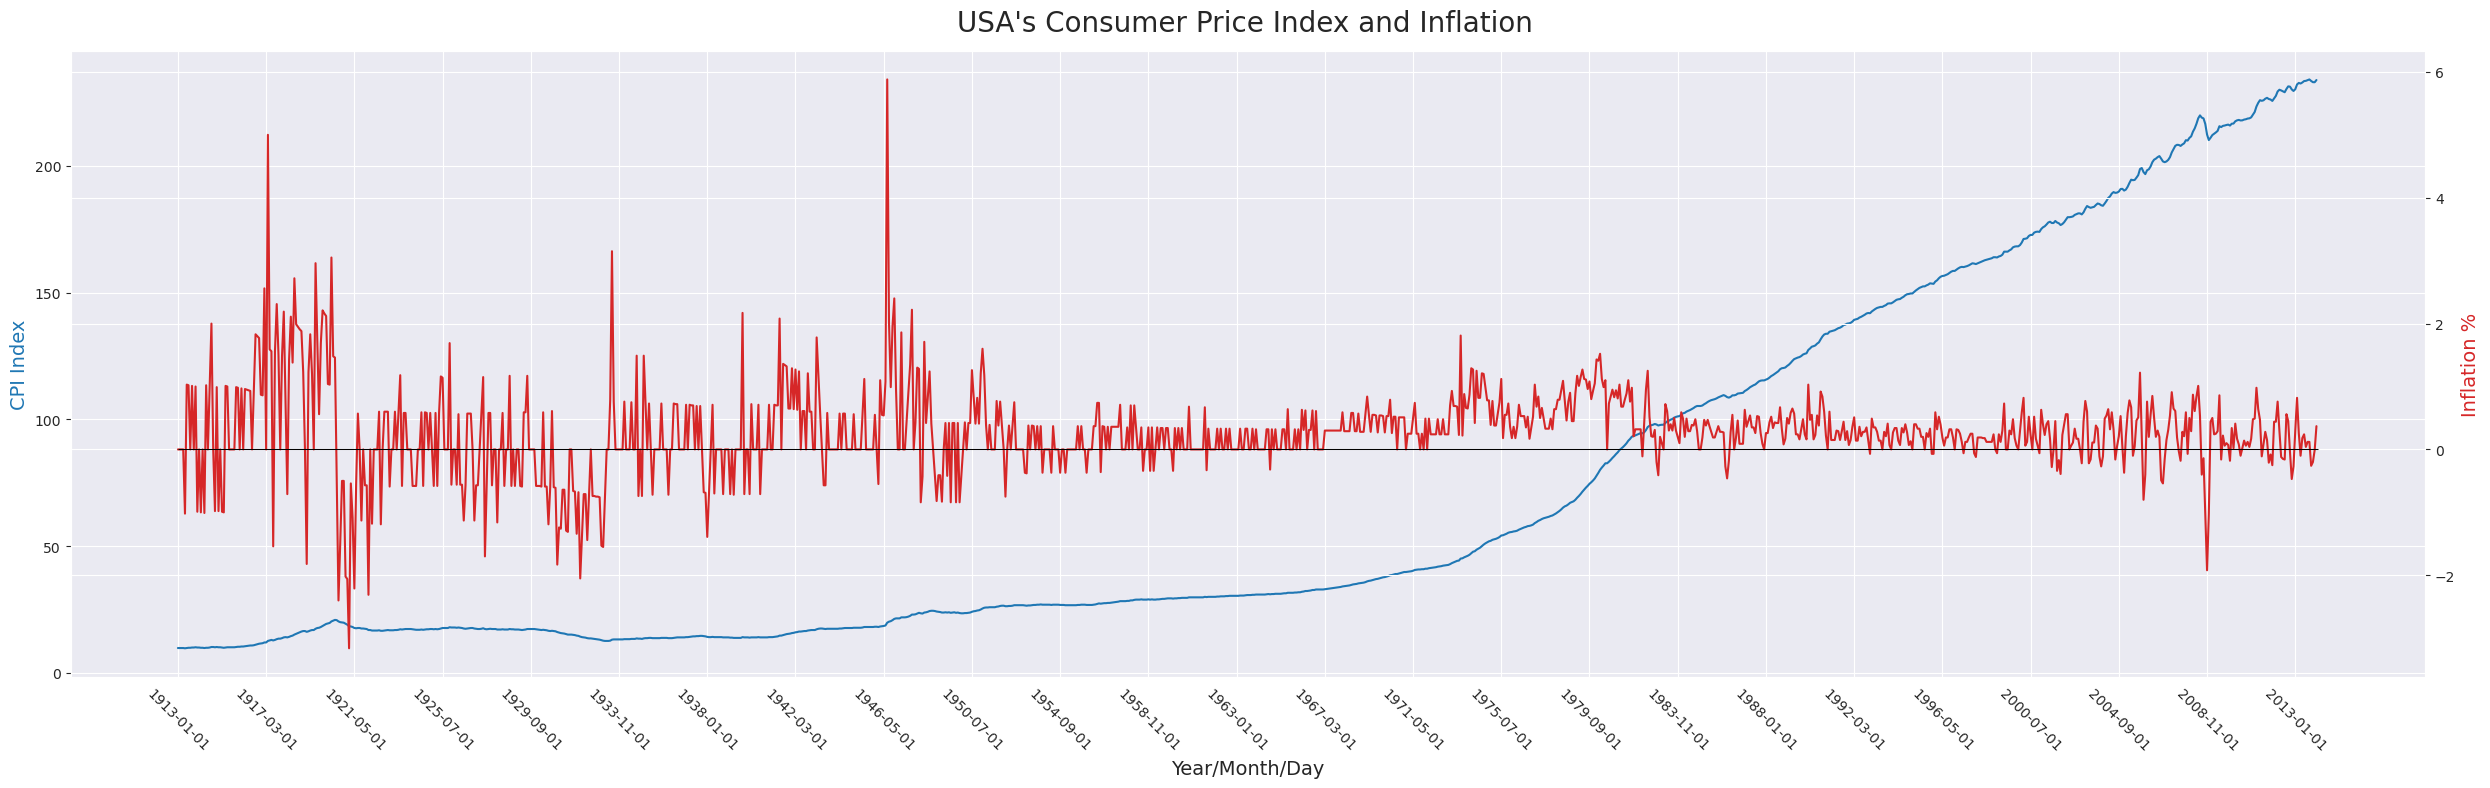

In [18]:
fig, ax = plt.subplots(figsize=(25,8))
plt.suptitle("USA's Consumer Price Index and Inflation", fontsize=20)
plt.xticks(np.arange(0, len(data['Date'])+1, 50),rotation = -45)

ax.plot(ndata['Index'],label='Index')
ax.set_xlabel("Year/Month/Day", fontsize = 14)
ax.set_ylabel("CPI Index", color='C0' , fontsize = 14)

ax2 = ax.twinx()
ax2.plot(ndata['Inflation'],label='Inflation', color = 'C3')
ax2.hlines(y=0, xmin=0, xmax=len(data['Date']),linewidth=0.75, color='black')

ax2.set_ylabel("Inflation %", color='C3', fontsize = 14)
plt.tight_layout()
plt.savefig('CPI_Inlfation.jpg')

In [19]:
cdata = data.groupby(['Date'])['Index'].median().reset_index()
cdata = pd.DataFrame(cdata)
cdata = cdata.set_index(['Date'])

In [20]:
cdata.head()

,Index
Date,
1913-01-01,9.8
1913-02-01,9.8
1913-03-01,9.8
1913-04-01,9.8
1913-05-01,9.7


In [21]:
from pylab import rcParams
from scipy.fftpack import fftfreq
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(cdata,model='additive',period=12)

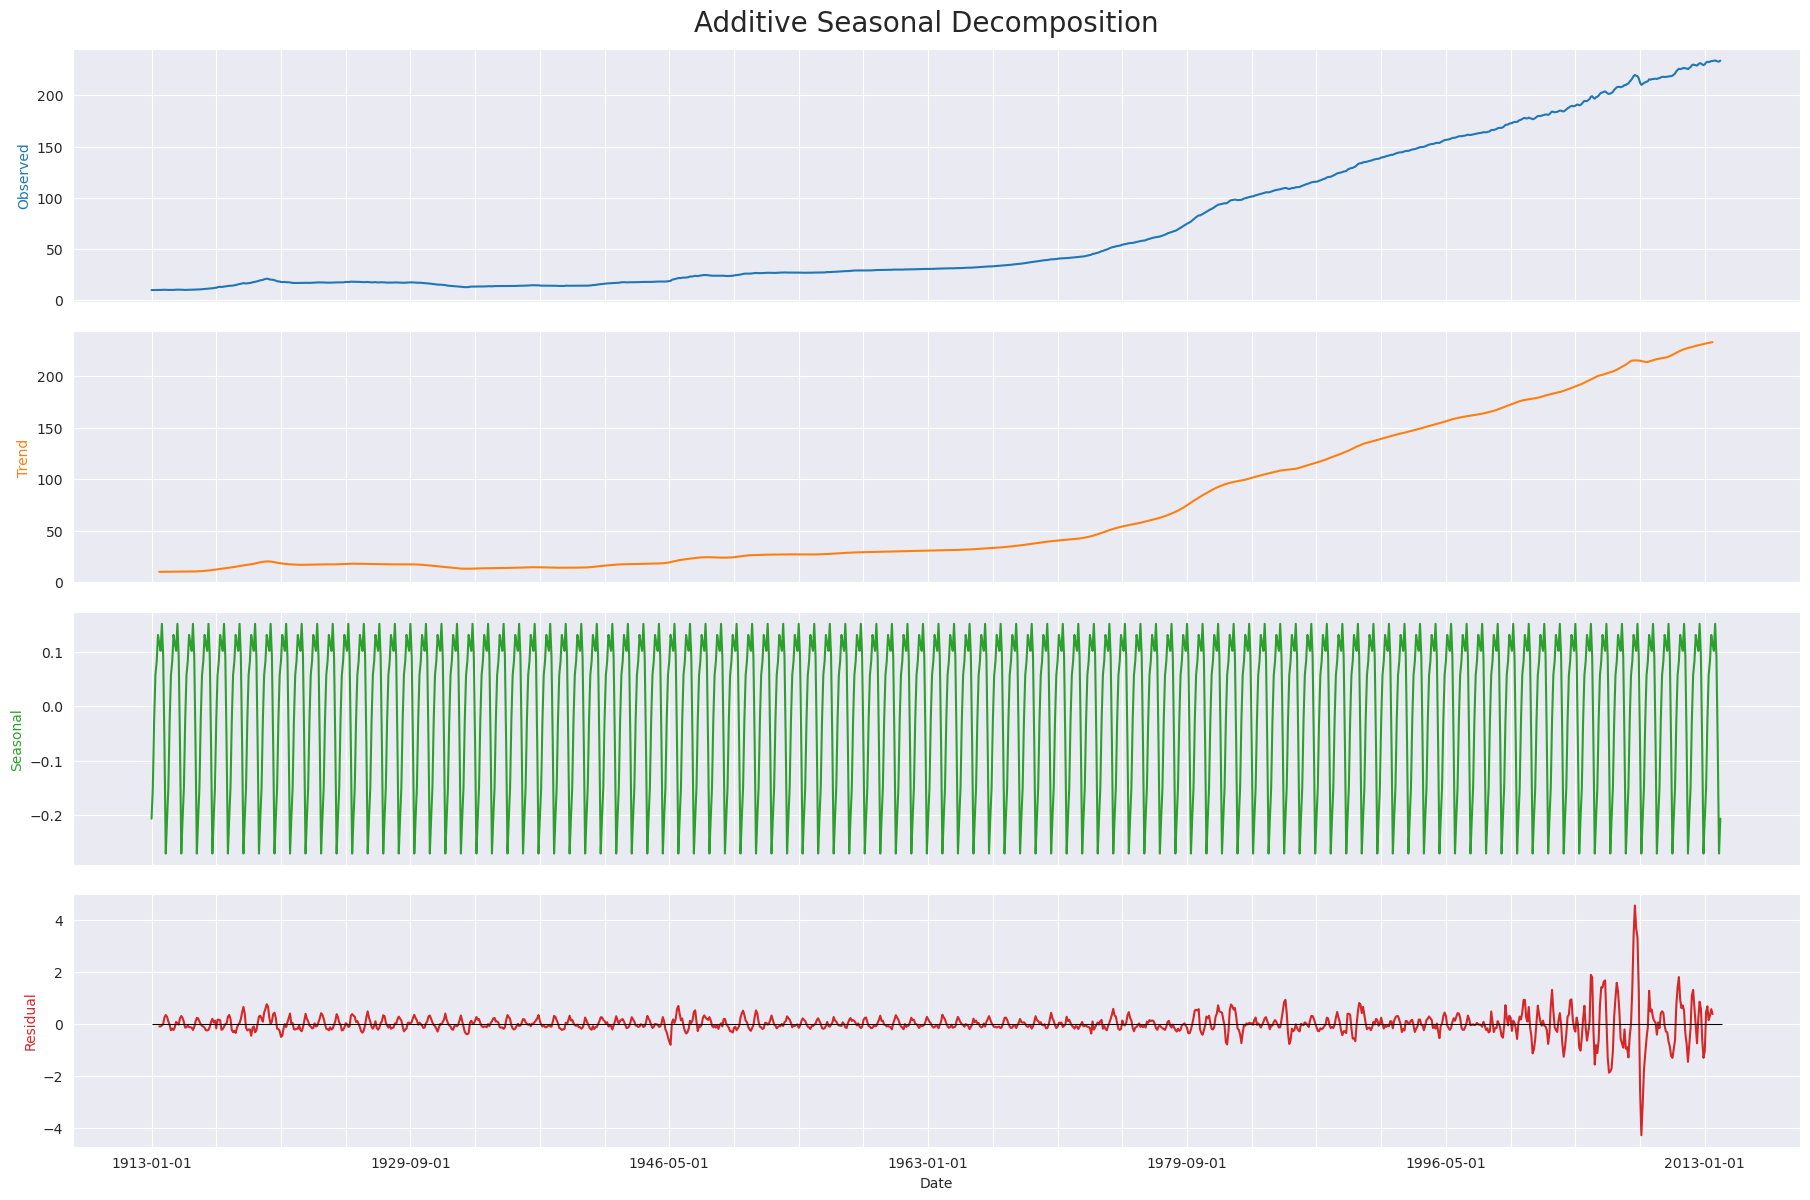

In [22]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(18,12),sharex=True)
plt.suptitle("Additive Seasonal Decomposition", fontsize=20)
plt.tight_layout()
decomposition.observed.plot(ax=ax1,ylabel='Observed',color='C0')
ax1.set_ylabel("Observed", color='C0')
decomposition.trend.plot(ax=ax2,ylabel='Trend',color='C1')
ax2.set_ylabel("Trend", color='C1')
decomposition.seasonal.plot(ax=ax3,ylabel='Seasonal',color='C2')
ax3.set_ylabel("Seasonal", color='C2')
decomposition.resid.plot(ax=ax4,ylabel='Residual',color='C3')
ax4.set_ylabel("Residual", color='C3')
ax4.hlines(y=0, xmin=0, xmax=len(data['Date']),linewidth=0.75,color='Black')
plt.xticks(np.arange(0, len(data['Date'])+1, 50),rotation = 0); #The use of ; to silence print in console
plt.savefig('Additive_Seasonal_Decomposition.jpg',dpi=400, bbox_inches = "tight")

### Building an ARIMA Model for Forcasting in Python

### Augmented Dickey-Fuller (ADF) test: To inference if the time series is stationary or not using p-values

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(cdata)
print(adf_test)
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])           

### Kwiatkowki-Philllips-Schmidt-Shin (KPSS) test

In [ ]:
from statsmodels.tsa.stattools import kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter('ignore', InterpolationWarning)

kpss_test = kpss(cdata)
print(kpss_test)
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

__Inference: p-value is less than 0.05. This means that the series is not stationary__

### Box Cox transformation to make variance constant

In [ ]:
from scipy.stats import boxcox
# Transforms non-gaussian distribution data into gaussian distribution / normal distribution
data_boxcox = pd.Series(boxcox(cdata['Index'], lmbda=0))
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), cdata.index)
data_boxcox_diff.dropna(inplace=True)



fig, ax = plt.subplots(figsize=(25,8))
plt.suptitle('USA CPI Before and After Box Cox transform and Differentiation', fontsize=20)
plt.xticks(np.arange(0, len(data['Date'])+1, 50),rotation = -45);

ax.plot(data_boxcox, label = 'Box Cox transformation', color = 'C1')
ax.set_xlabel("Year/Month/Day", fontsize = 14)
ax.set_ylabel("CPI Index after Box Cox Transform", color='C1' , fontsize = 14)

ax2 = ax.twinx()
ax2.plot(cdata, label = 'CPI')
ax2.set_ylabel("CPI Index", color='C0' , fontsize = 14)

ax3 = ax.twinx()

ax3.plot(data_boxcox_diff, label='After Box Cox transformation and differencing',color='C2')
ax3.hlines(y=0, xmin=0, xmax=len(data['Date']),linewidth=0.75, color='black')

handles, labels = [(a + b + c) for a, b,c in zip(ax2.get_legend_handles_labels(),ax.get_legend_handles_labels(),ax3.get_legend_handles_labels())]
plt.legend(handles, labels, loc='upper left')

plt.tight_layout()
plt.savefig('BoxCox.jpg')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

with plt.rc_context():
    plt.rc("figure", figsize=(8,8))
    plot_acf(data_boxcox_diff)
    plt.savefig('Autocorrelation.jpg')

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
with plt.rc_context():
    plt.rc("figure", figsize=(8,8))
    plot_pacf(data_boxcox_diff)
    plt.savefig('Partial_Autocorrelation.jpg')

## Fit an ARIMA model

### Fit on all% Data

In [ ]:
from sklearn.model_selection import train_test_split

train, test= train_test_split(cdata, test_size=0.2,shuffle=False)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

In [ ]:
import warnings
warnings.filterwarnings('ignore');

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_boxcox_diff, order=(6,1,15))
model_fit = model.fit()

In [ ]:
#Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

In [ ]:
future_predict = model_fit.predict(start = len(ndata),end = (len(ndata))+12)
future_predict = future_predict.cumsum()
future_predict = np.exp(future_predict.add(data_boxcox[0]))
future_predict = future_predict * (data['Index'].max()/future_predict.mean())

In [ ]:
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
plt.figure(figsize=(25,8))

plt.plot(train, label='train',color='C0')
plt.plot(test, label='test',color='C1')
y_hat_ar_df = y_hat_ar['ar_forecast'][test.index.min():].to_frame()
plt.plot(y_hat_ar_df, label='ARIMA',color='C2')
future_predict.plot(label='Predicted year',color='C3')


plt.legend(loc='best')

plt.title('ARIMA Model predictions')
plt.tight_layout()
plt.savefig('AM_Predictions.jpg')

In [ ]:
future = pd.DataFrame({'Date':future_predict.index, 'Index':future_predict.values})
future.set_index('Date',inplace=True)

final = train.append(test)
final = final.append(future)

In [ ]:
data_boxcox = pd.Series(boxcox(final['Index'], lmbda=0))
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), cdata.index)
data_boxcox_diff.dropna(inplace=True)
diff_df = pd.DataFrame({'Date':data_boxcox_diff.index, 'Index':data_boxcox_diff.values})
diff_df = diff_df.set_index('Date')
diff_df = diff_df.mul({'Index': 100})

In [ ]:
diff_df.tail()

In [ ]:
fig, ax = plt.subplots(figsize=(25,8))
plt.suptitle('USA Box Cox Differenciation with Predicted Values Appended', fontsize=20)
plt.xticks(np.arange(0, 1226, 50),rotation = -45);
ax.plot(diff_df, label = 'Inflation: Scaled [Box Cox transformation and diffferentiation] ', color = 'C1')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('Inflation_Predicted.jpg', dpi=400)